# Ch3 - linear regression

This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

In [238]:
library(ISLR2)
library(ggplot2)
library(dplyr)
library(tibble)
library(magrittr)
dim(Boston)
head(Boston)

[1] 506  14

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,radclass
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,Low
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,Low
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,Low
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,Low
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,Low
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,Low


In [107]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5


(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

In [152]:
fits = list()
fits_coeffs = list()

for(i in 2:length(names(ISLR2::Boston))){
  resfit1 = lm(paste0("crim ~ ",names(ISLR2::Boston)[i]), Boston)
  b = summary(resfit1)
  fits[names(Boston)[i]] <- b$coefficients[2,4]
  fits_coeffs[names(Boston)[i]] <- b$coefficients[2,1]
}

In [153]:
fits[fits>0.05]
#all fits are significant except chas

$chas
[1] 0.2094345

In [154]:
fits

$zn
[1] 5.506472e-06

$indus
[1] 1.450349e-21

$chas
[1] 0.2094345

$nox
[1] 3.751739e-23

$rm
[1] 6.346703e-07

$age
[1] 2.854869e-16

$dis
[1] 8.519949e-19

$rad
[1] 2.693844e-56

$tax
[1] 2.357127e-47

$ptratio
[1] 2.942922e-11

$lstat
[1] 2.654277e-27

$medv
[1] 1.173987e-19

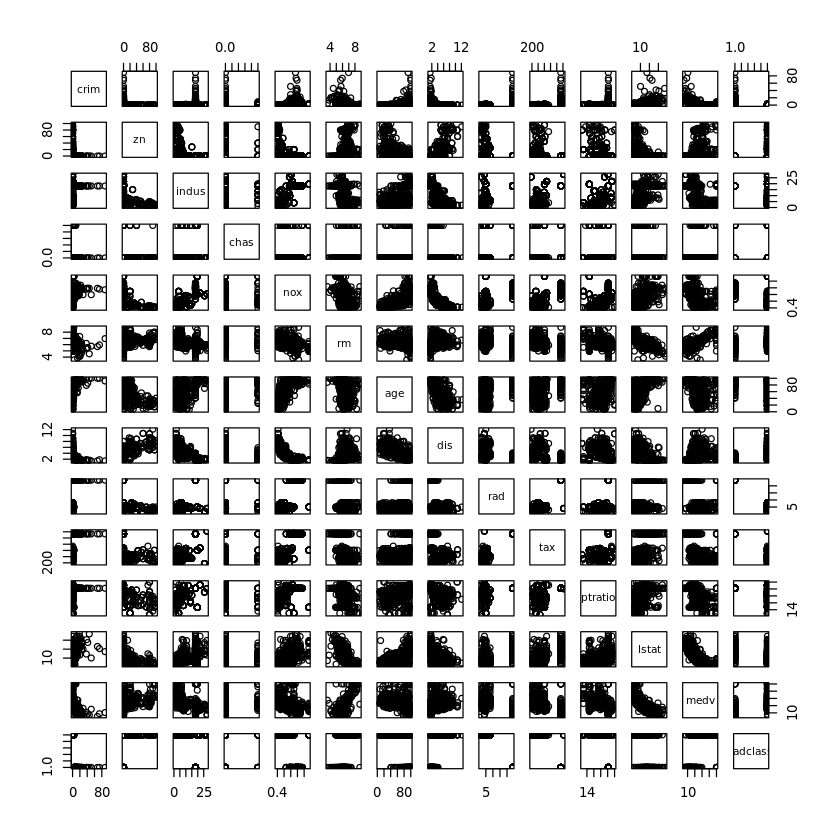

In [155]:
pairs(Boston)

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”
Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


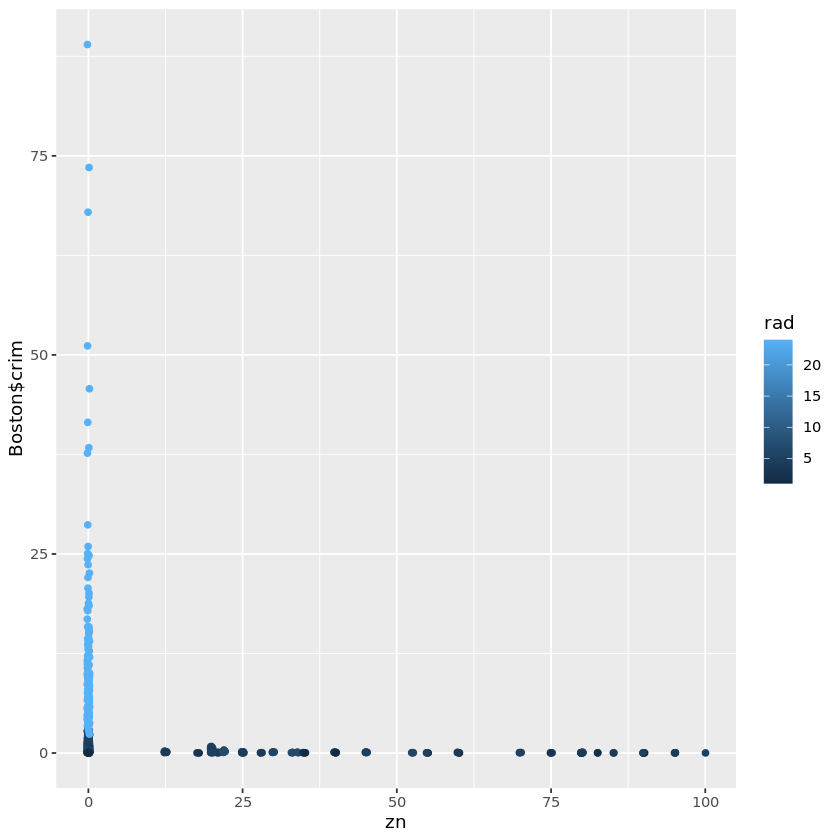

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


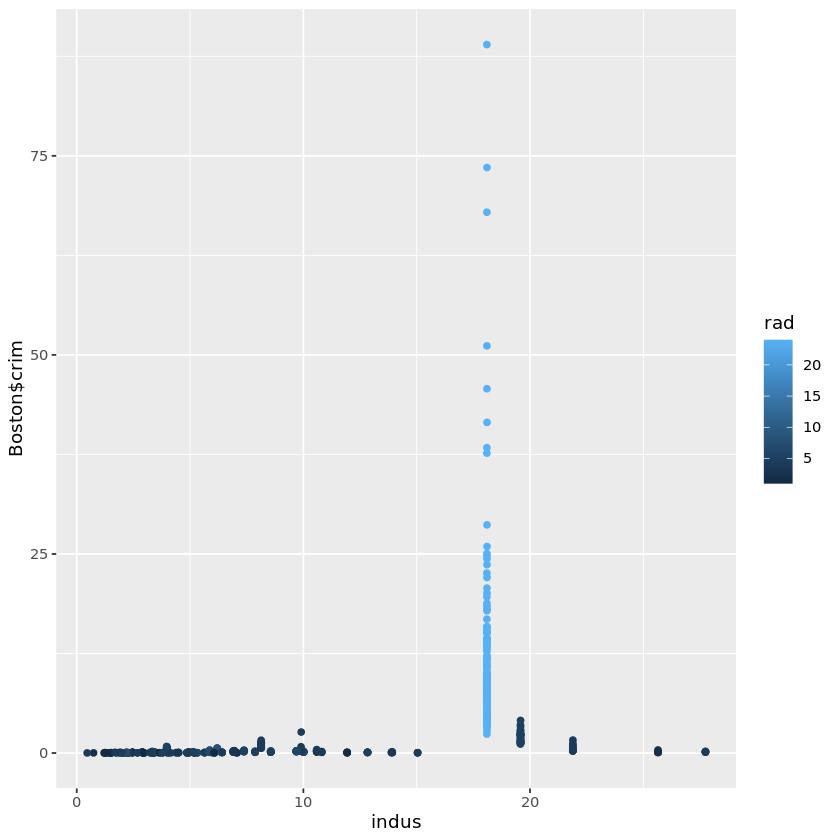

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


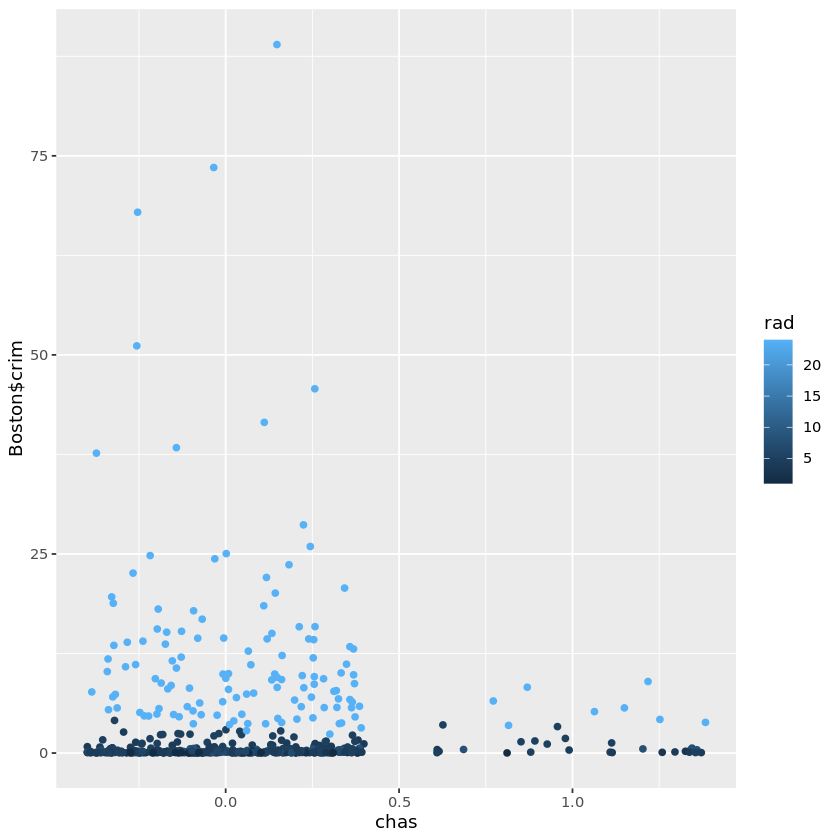

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


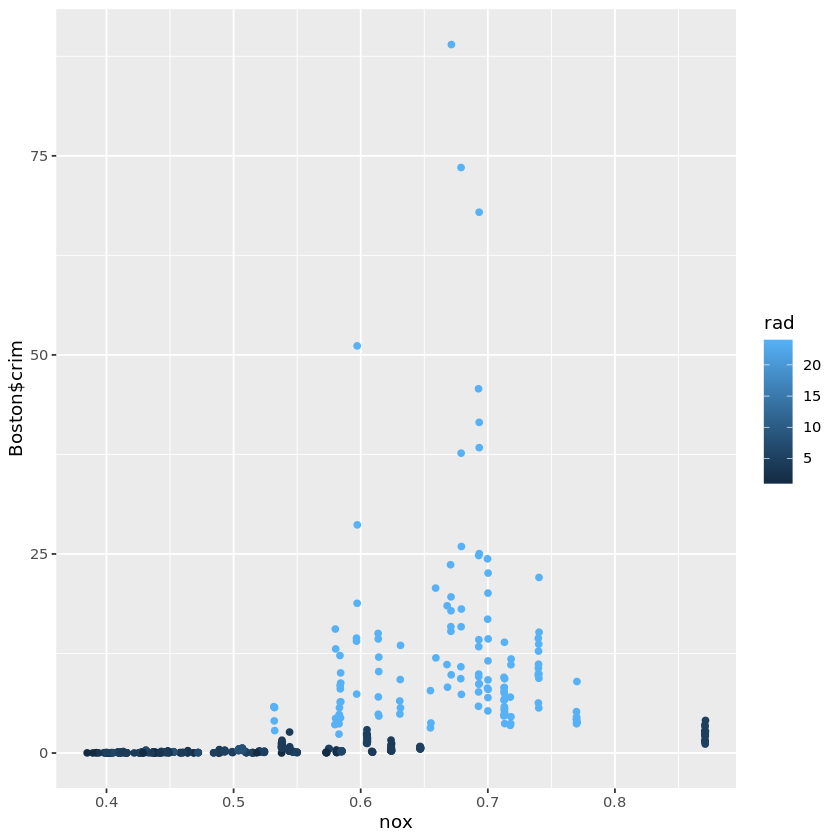

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


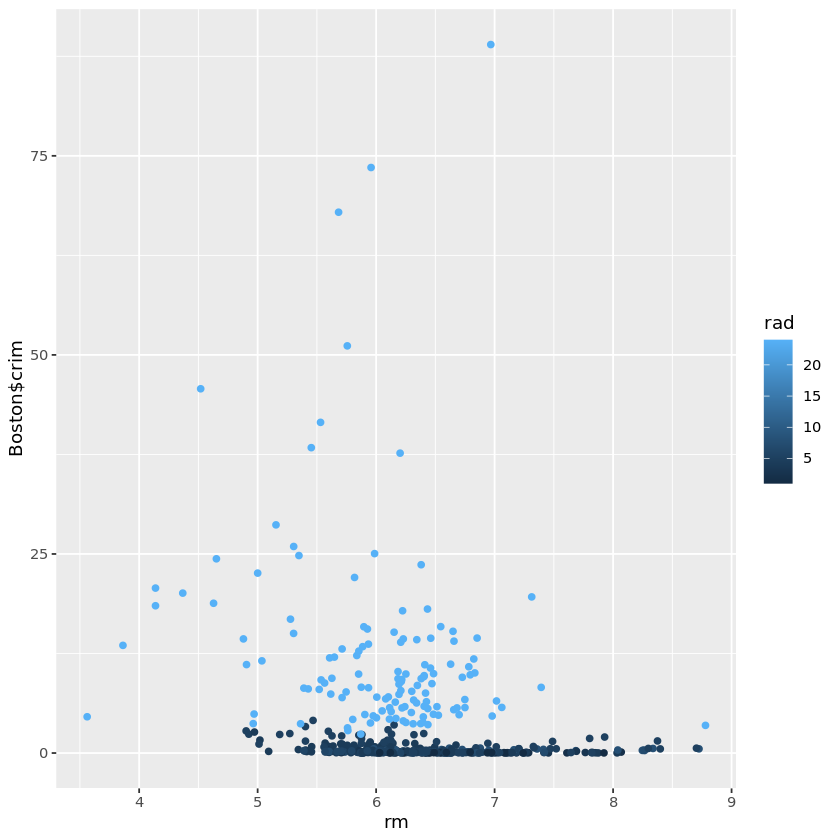

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


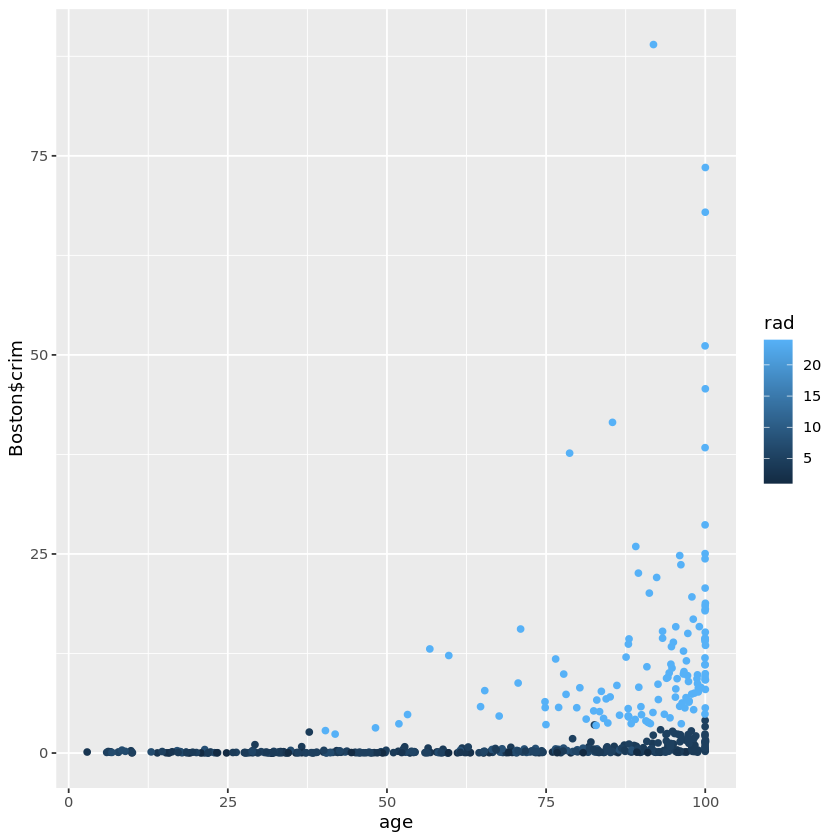

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


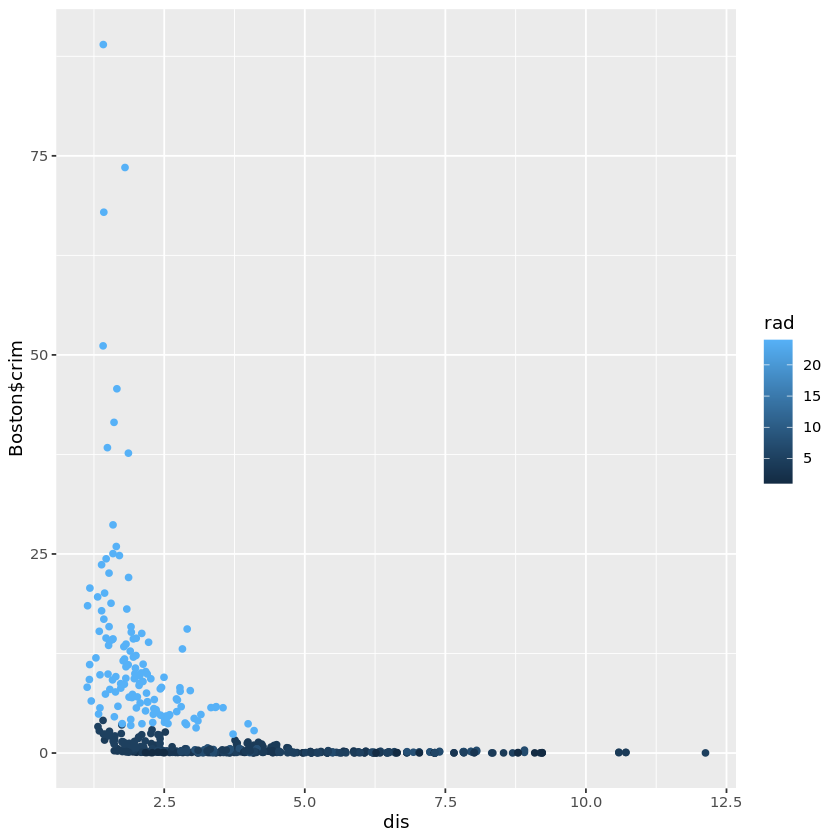

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


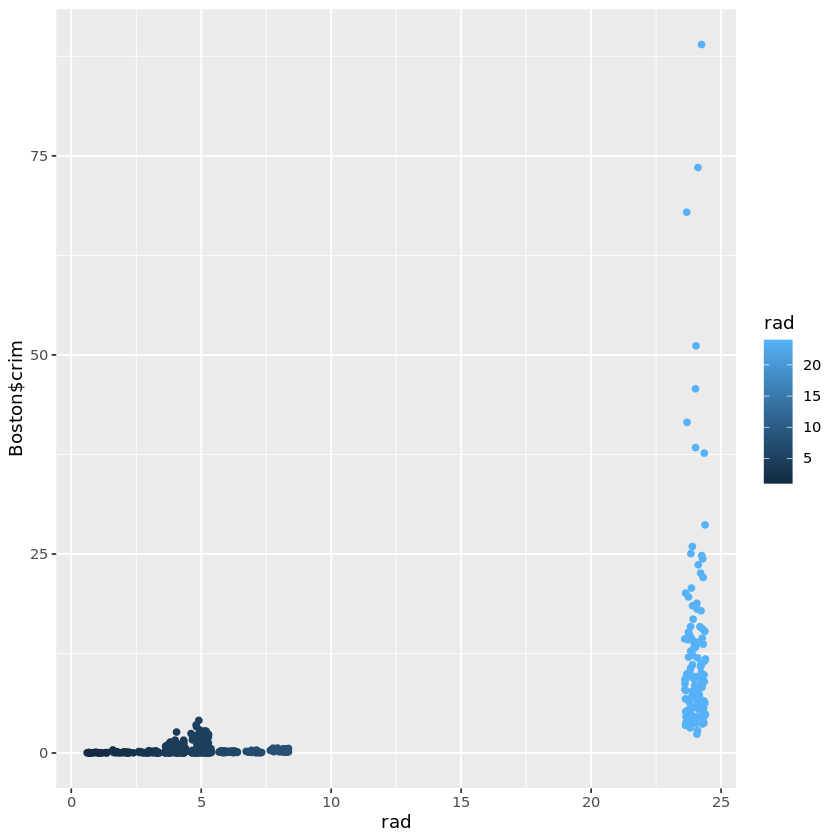

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


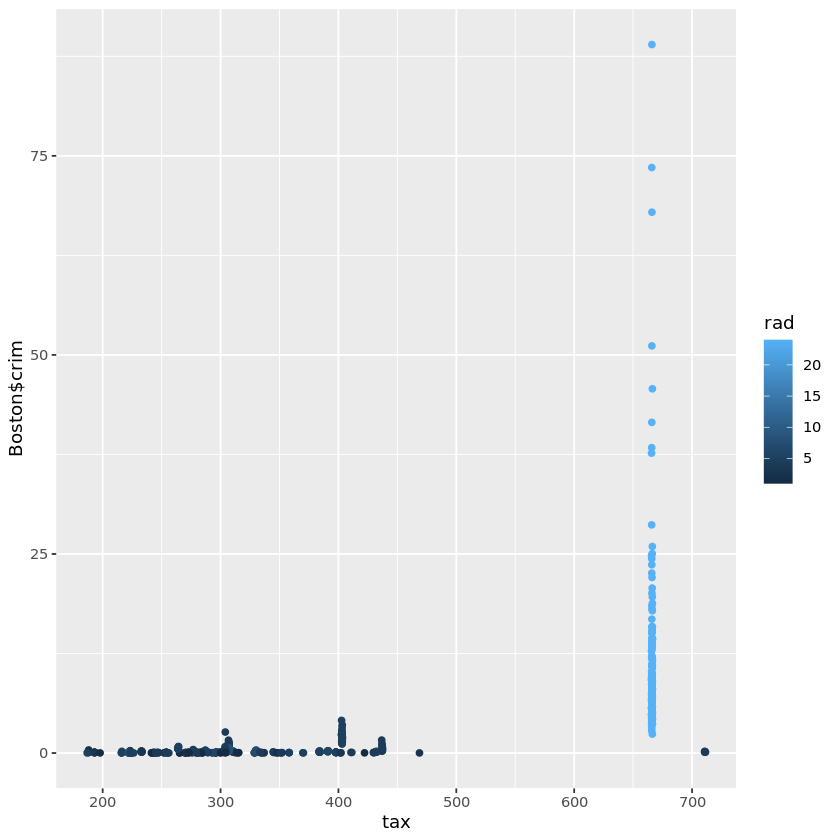

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


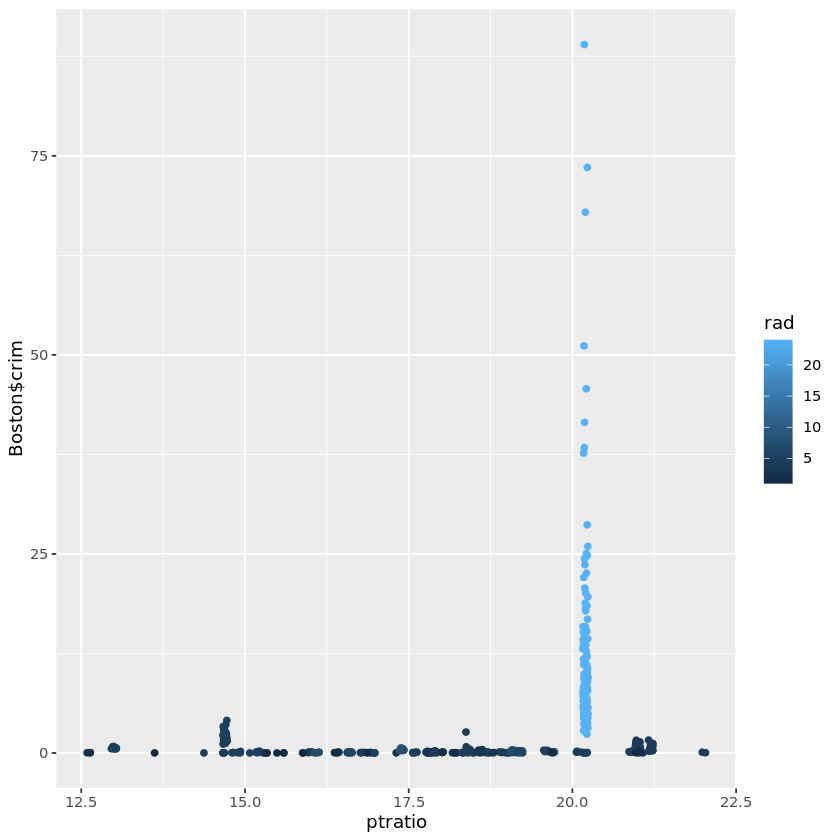

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


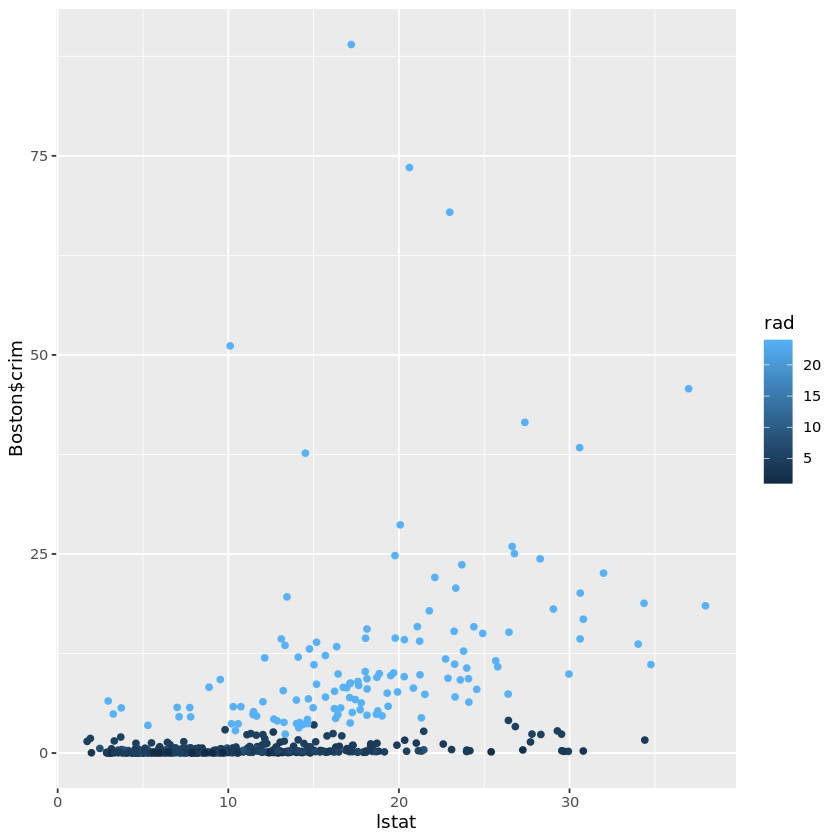

Warning message:
“Use of `Boston$crim` is discouraged. Use `crim` instead.”


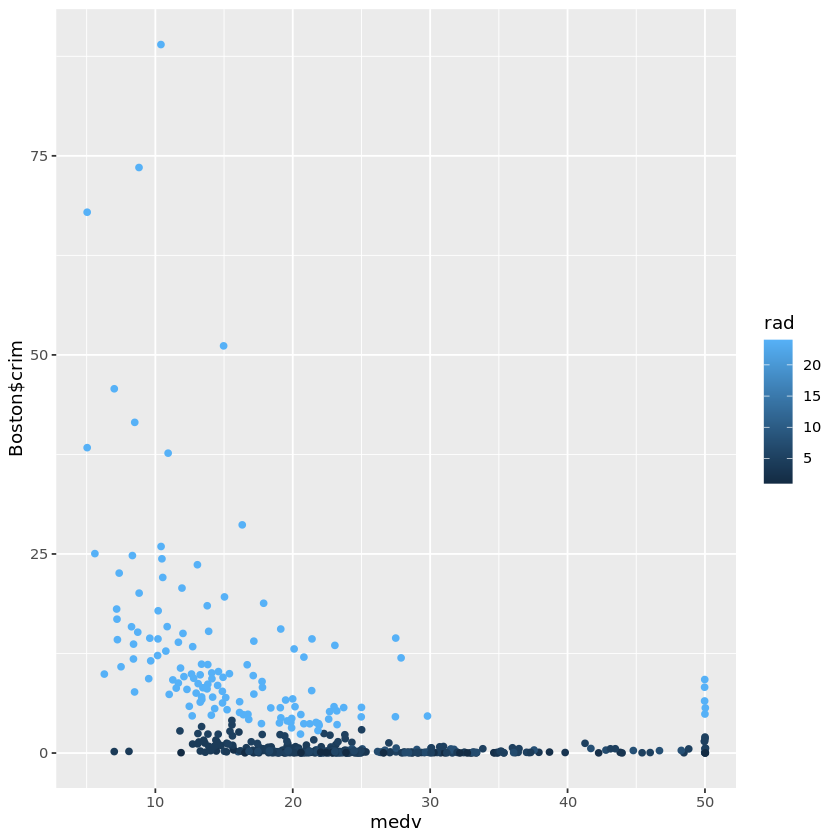

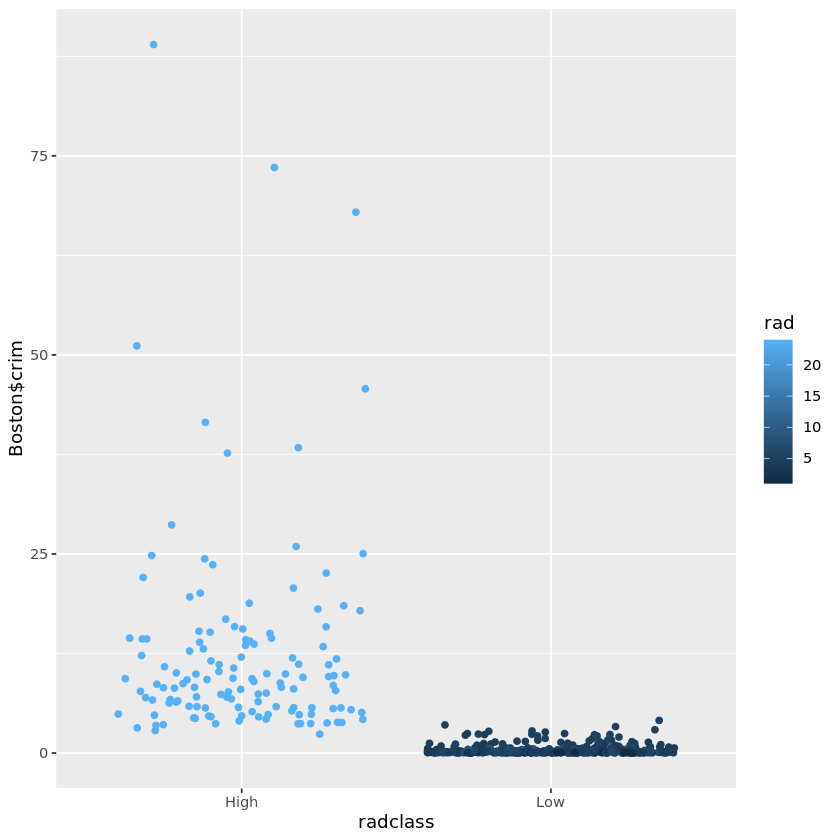

In [156]:
plots = {}
for(i in 2:length(names(Boston))){
    print(ggplot(Boston, aes(x=Boston[,i], y=Boston$crim, color=rad)) + geom_jitter(aes(Boston[,i])) + 
      xlab(names(Boston)[i])
      )
}


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



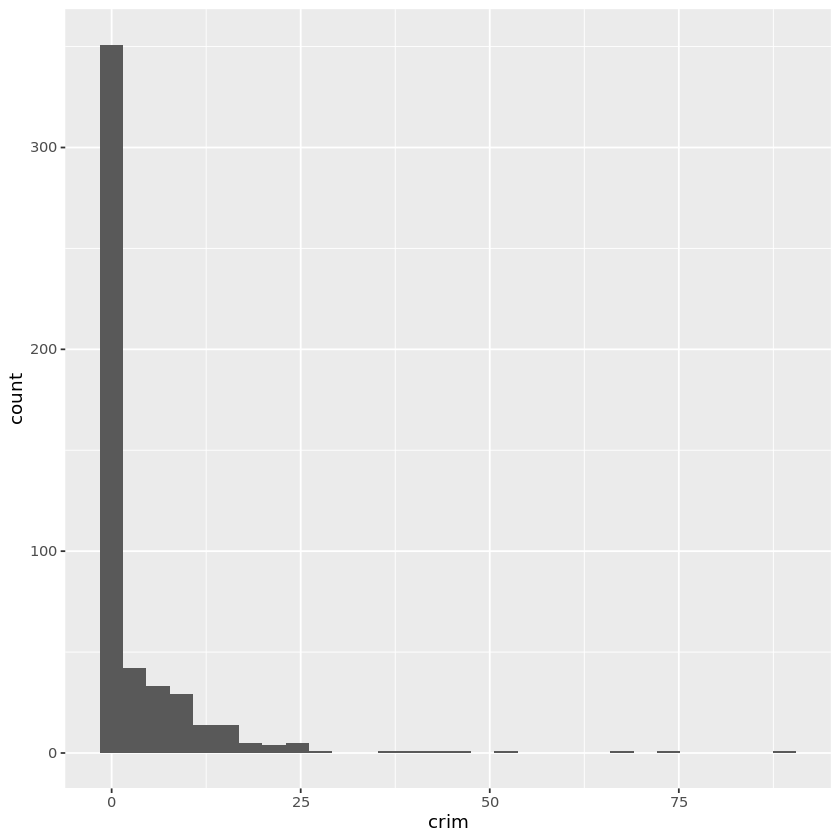

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



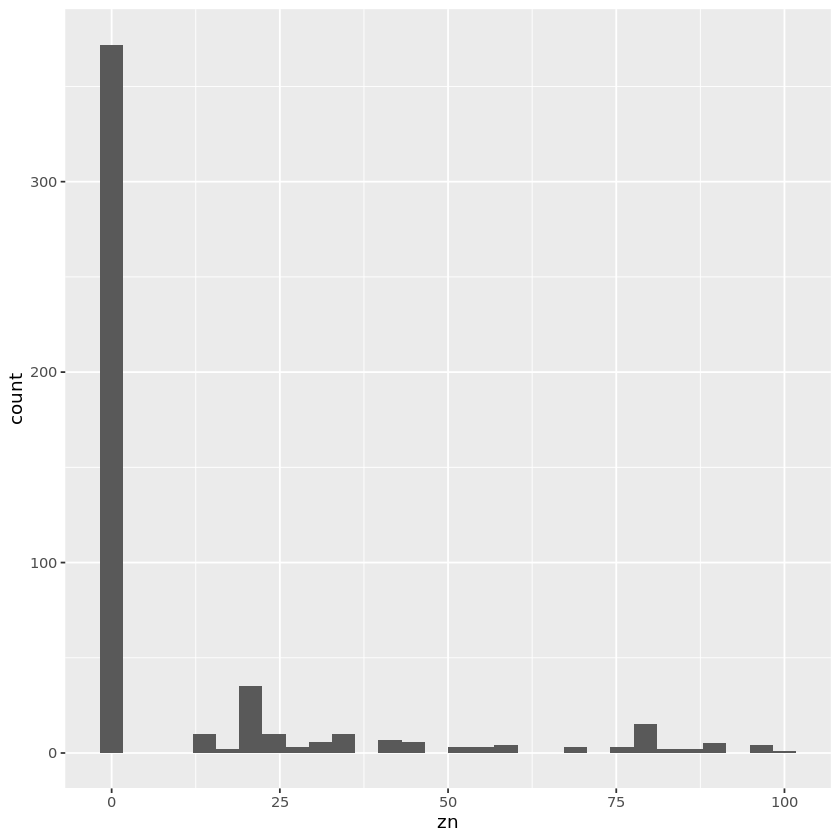

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



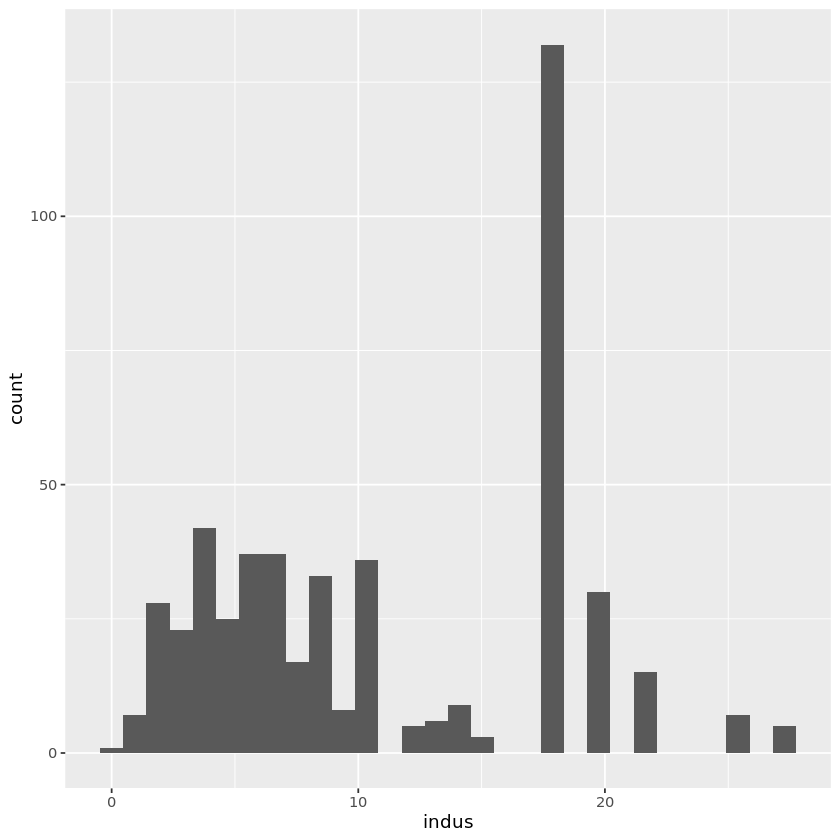

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



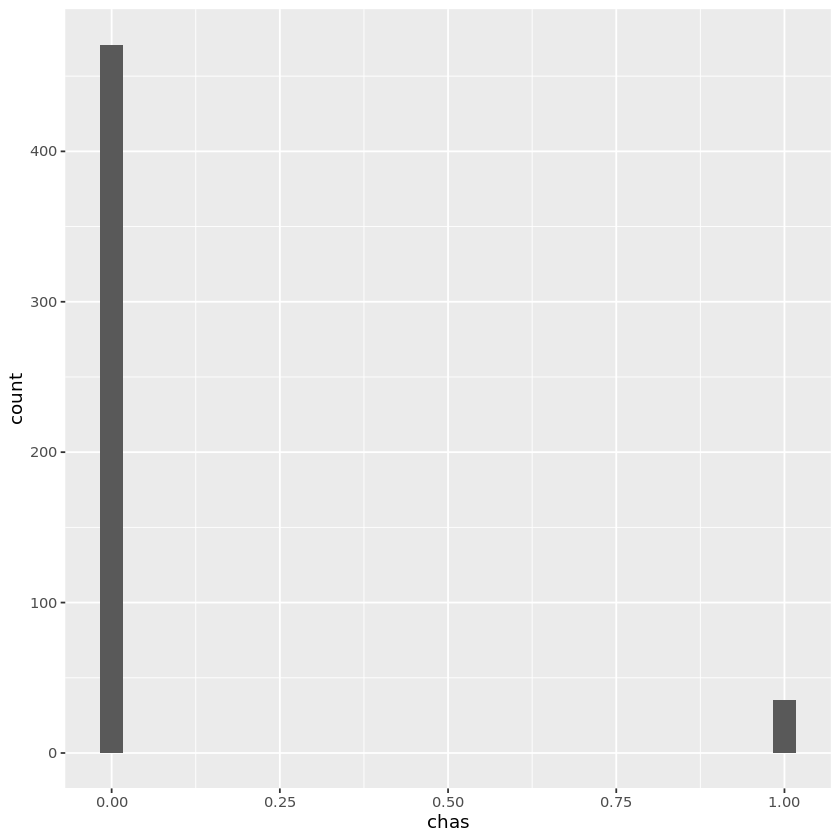

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



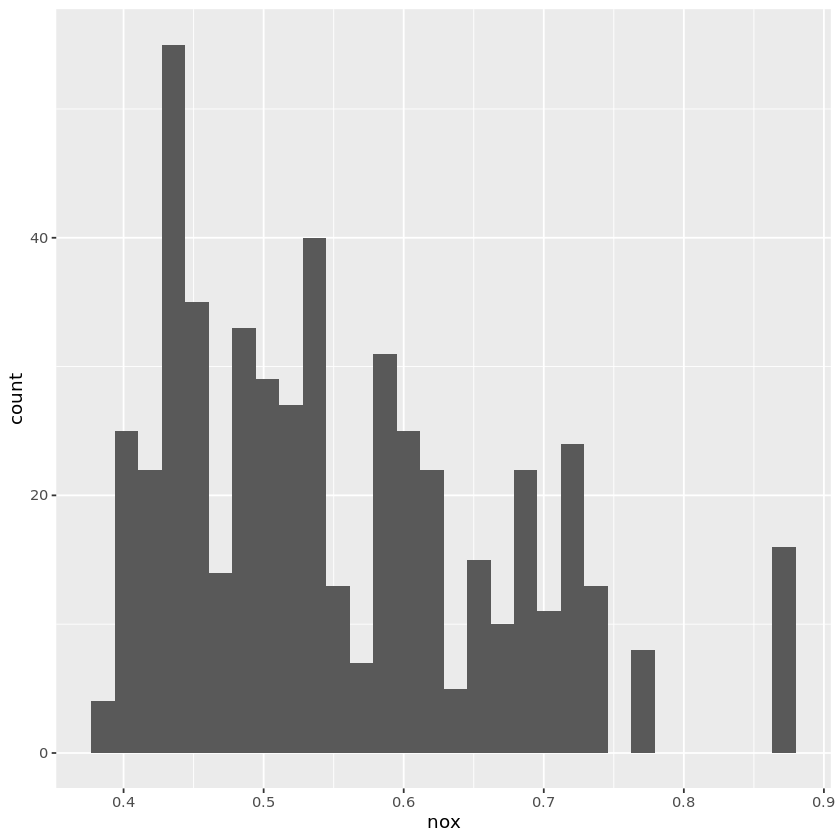

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



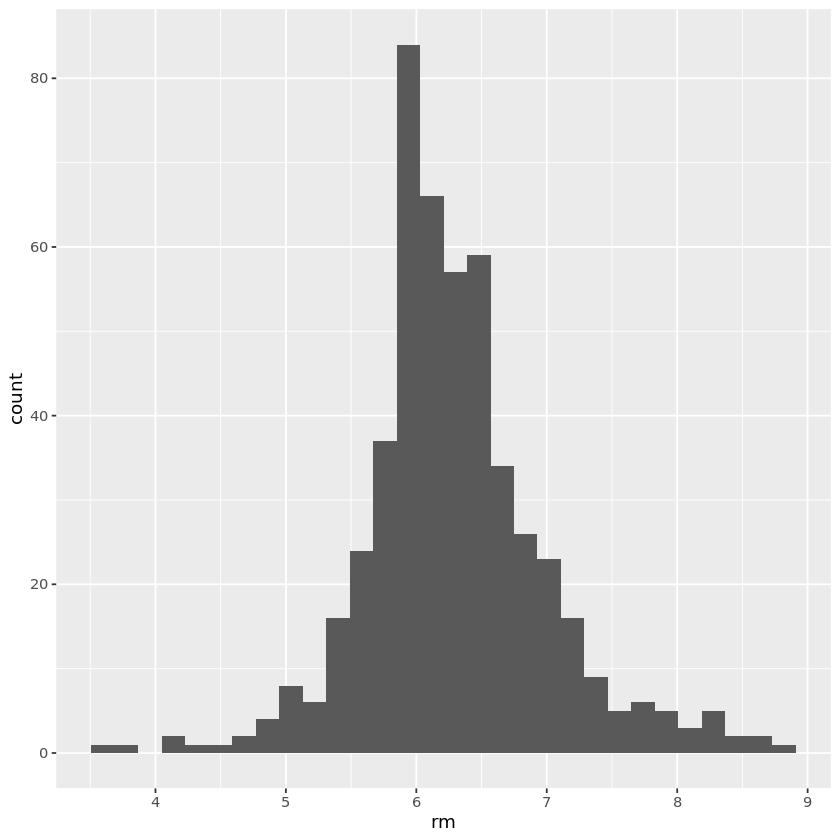

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



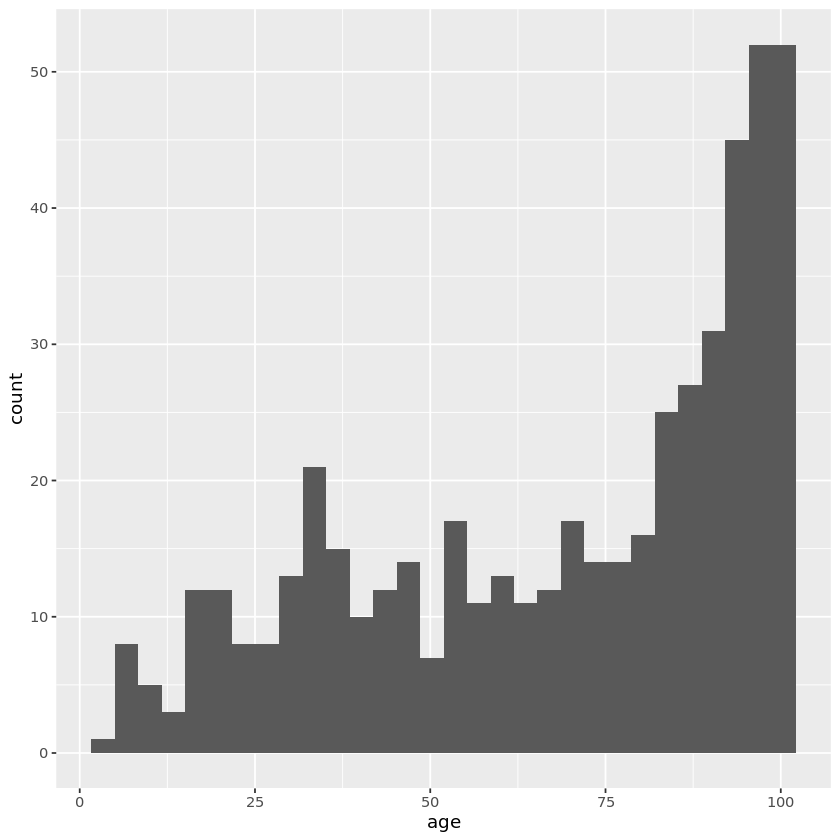

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



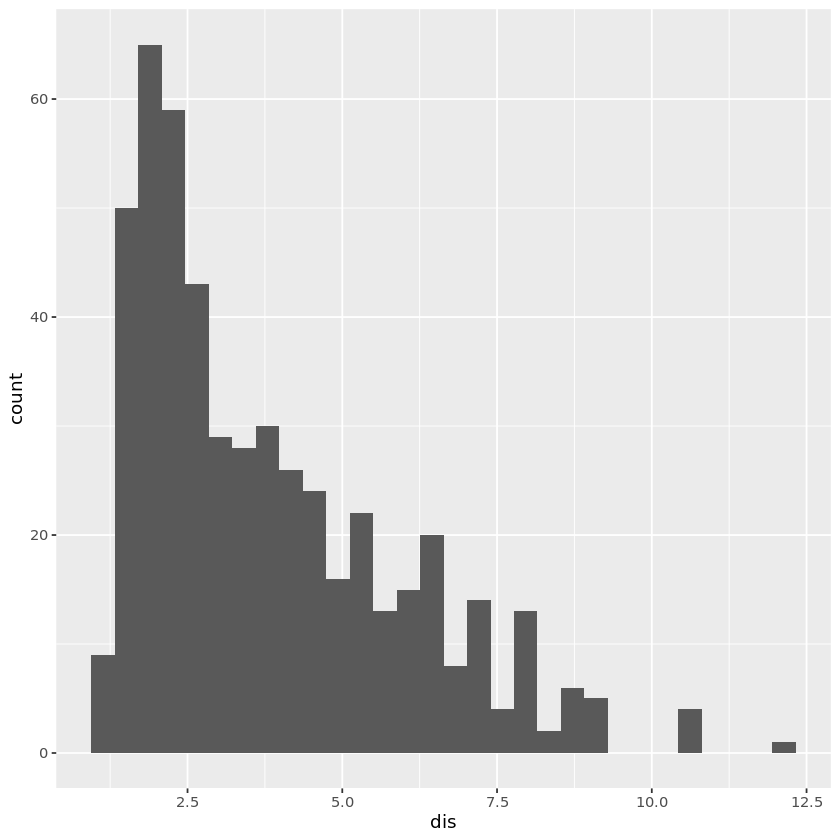

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



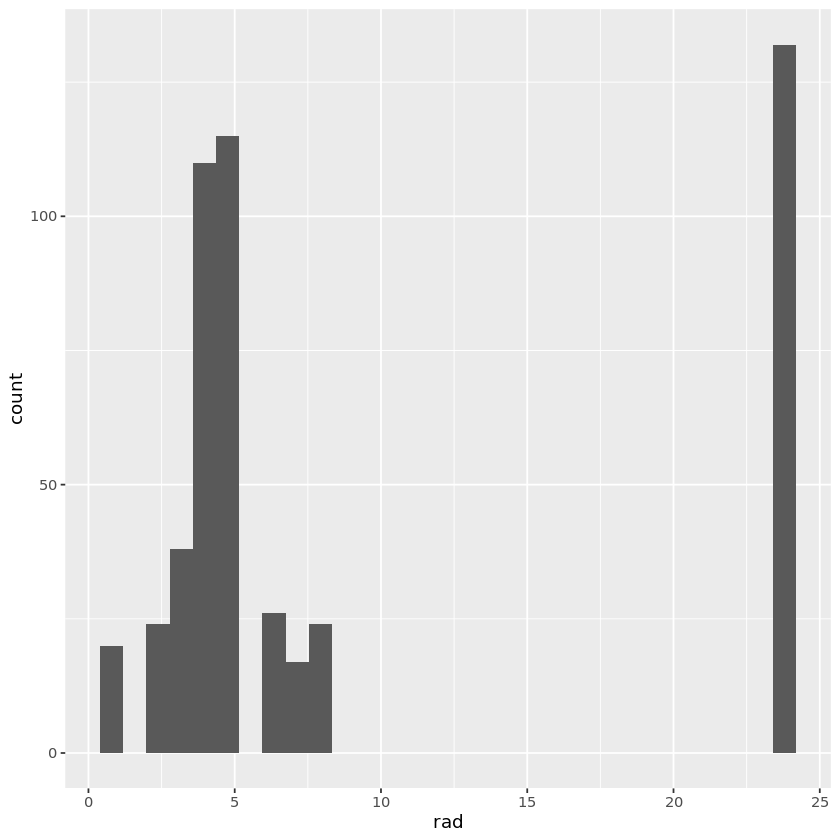

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



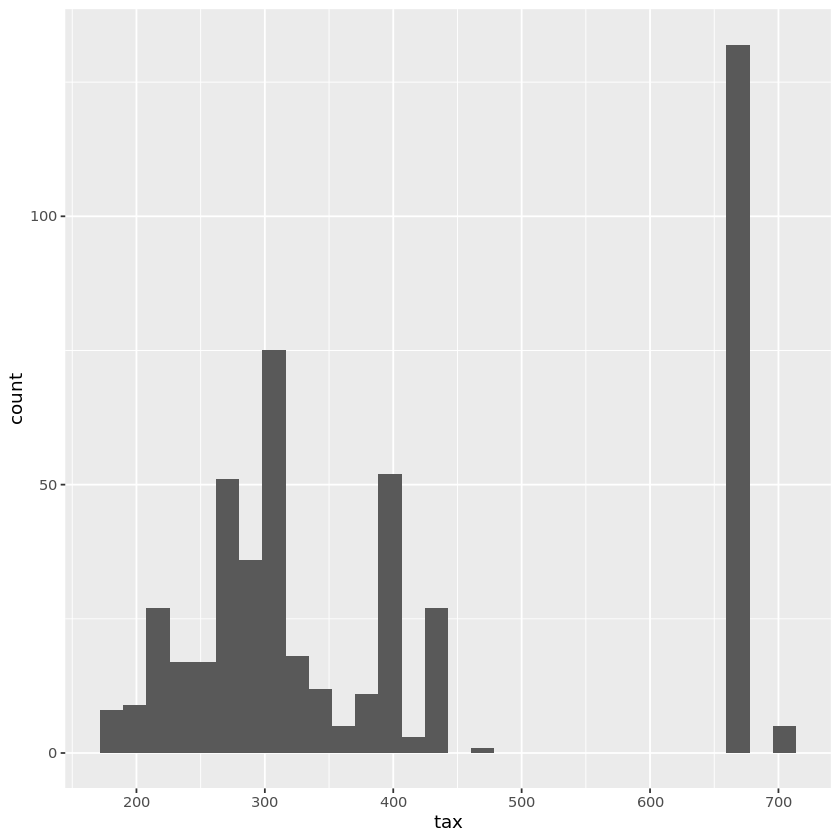

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



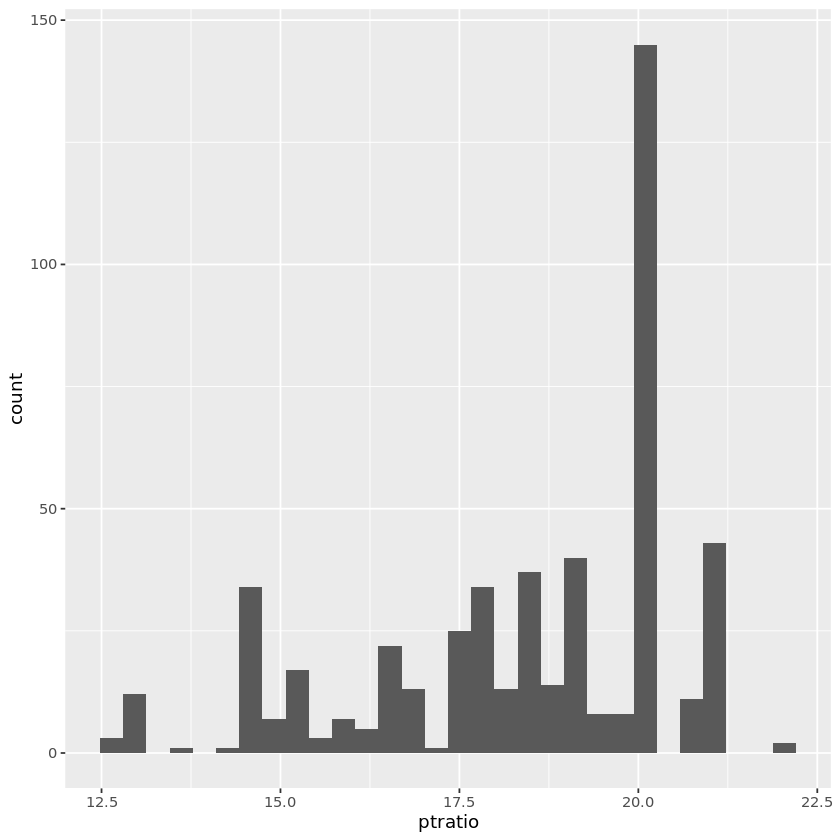

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



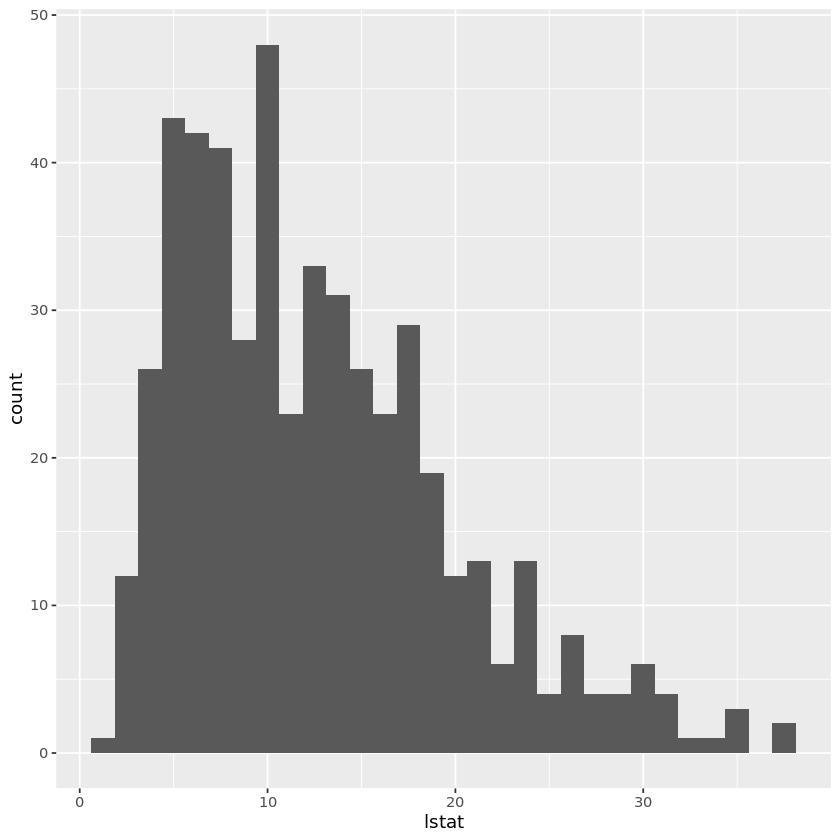

ERROR: Error: StatBin requires a continuous x variable: the x variable is discrete.Perhaps you want stat="count"?


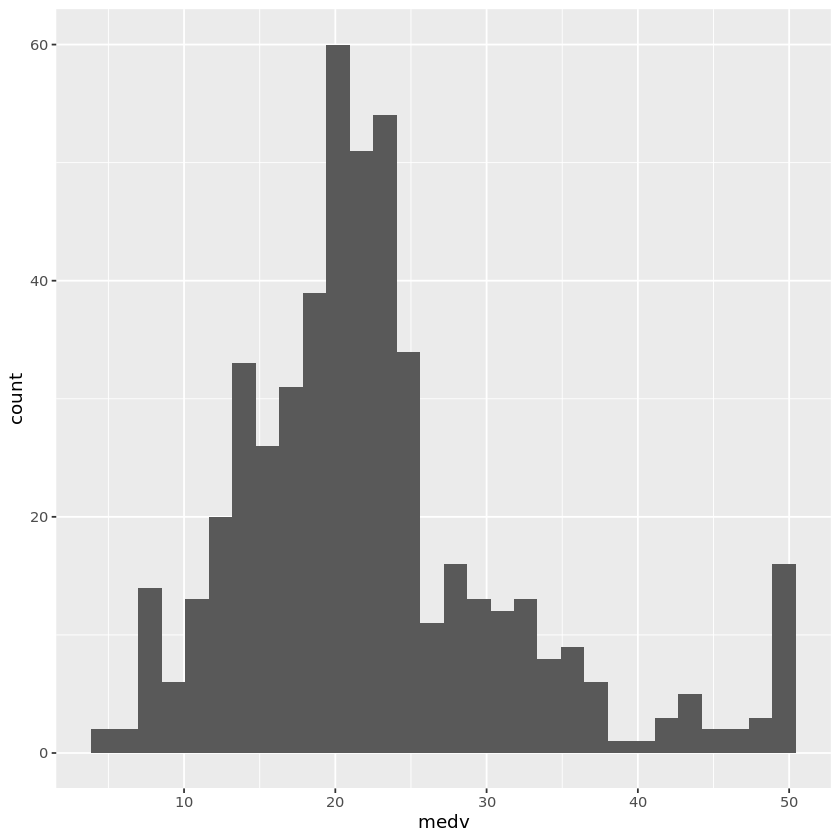

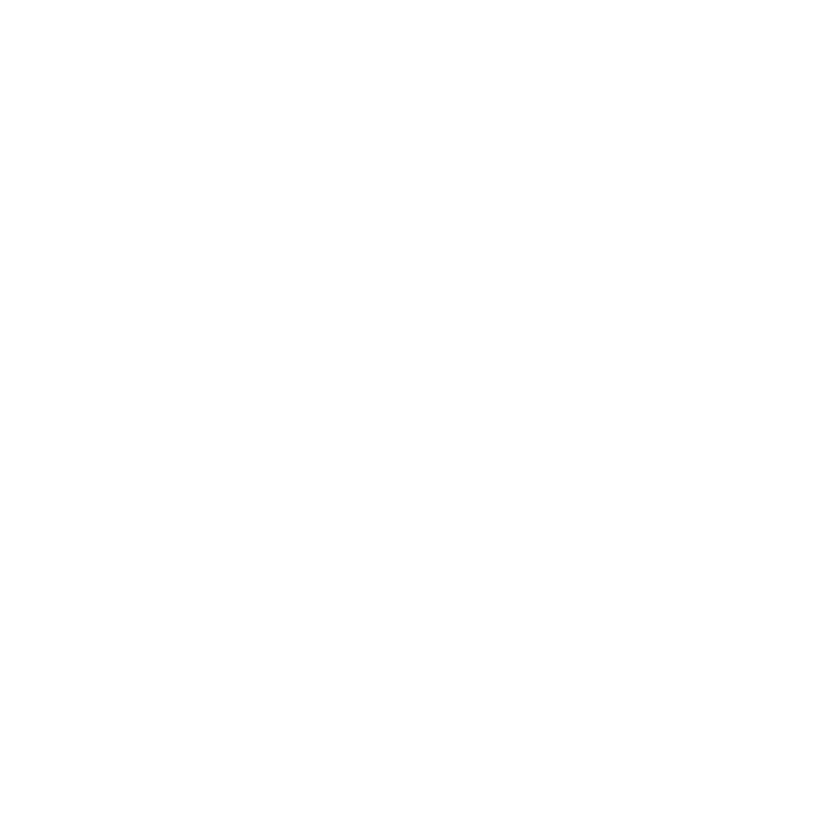

In [157]:
plots = {}
for(i in 1:length(names(Boston))){
    print(ggplot(Boston, aes(x=Boston[,i], color=rad)) + geom_histogram() + 
      xlab(names(Boston)[i])
      )
}

In [ ]:
Boston$radclass = as.factor(ifelse(Boston$rad>15, 'High', 'Low'))

In [ ]:
ggplot(Boston, aes(x=chas, y=crim, color=radclass)) + 
geom_boxplot()

(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

In [233]:
fit  = lm(crim ~ . -radclass, data=Boston)
b = summary(fit)

In [234]:
b$coefficients[,4]
b$coefficients[,4]>0.05


(Intercept)           zn        indus         chas          nox           rm 
5.227089e-02 1.534403e-02 4.857094e-01 4.858406e-01 6.036986e-02 3.007385e-01 
         age          dis          rad          tax      ptratio        lstat 
9.623231e-01 3.725942e-04 8.588123e-12 4.657565e-01 1.033932e-01 6.739844e-02 
        medv 
2.605302e-04

(Intercept)          zn       indus        chas         nox          rm 
       TRUE       FALSE        TRUE        TRUE        TRUE        TRUE 
        age         dis         rad         tax     ptratio       lstat 
       TRUE       FALSE       FALSE        TRUE        TRUE        TRUE 
       medv 
      FALSE

(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

Results from a) seemed to show that almost all variables showed some effect; however in B, there are many that are not needed in final fit.

var,single,multiple
<chr>,<dbl>,<dbl>
zn,-0.07393498,0.0457100386
indus,0.50977633,-0.0583501107
chas,-1.89277655,-0.8253775522
nox,31.24853120,-9.9575865471
rm,-2.68405122,0.6289106622
age,0.10778623,-0.0008482791
dis,-1.55090168,-1.0122467382
rad,0.61791093,0.6124653115
tax,0.02974225,-0.0037756465


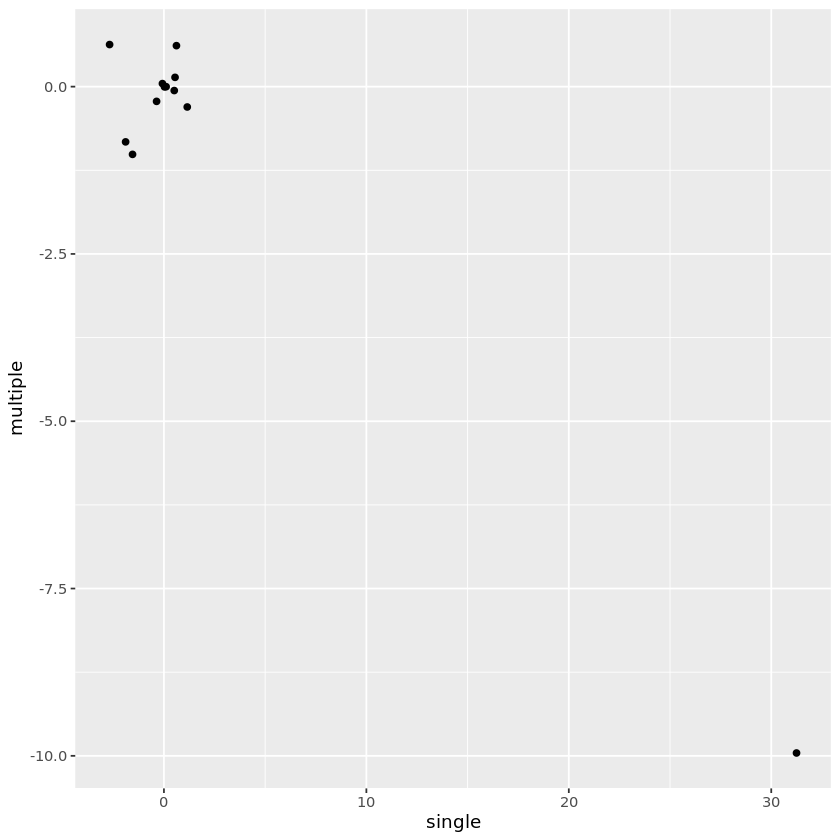

In [242]:
single = tibble::as_tibble(fits_coeffs)
single = tibble::as_tibble(cbind(nms = names(single), t(single)))
#single
multiple = tibble::as_tibble(b$coefficients[2:nrow(b$coefficients),1])
#multiple
res = cbind(single, multiple)
names(res) = c('var', 'single', 'multiple')
res %<>% mutate(single = as.double(single))
res
print( ggplot(res, aes(x=single, y=multiple)) + 
        geom_point()
      )
#res = dplyr::left_join(fits_coeffs, b$coefficients[2:nrow(b$coefficients),1])
#res
#res = cbind(single = fits_coeffs, multiple = b$coefficients[2:nrow(b$coefficients),1])
#res = as.data.frame(res)
#res

#res$single
                 #geom_point()


(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + ϵ.

In [272]:
fits_poly = c()

for(i in 2:length(names(ISLR2::Boston))){
  if(names(ISLR2::Boston)[i]=='chas'){
      
  }
  else{
    resfit1 = lm(paste0("crim ~ poly(",names(ISLR2::Boston)[i],",3)"), ISLR2::Boston)
    b = summary(resfit1)
    fits_poly <- c(fits_poly, b$coefficients[3:4,4])
  }
}

In [273]:
fits_poly[fits_poly < 0.05]

poly(zn, 3)2   poly(indus, 3)2   poly(indus, 3)3     poly(nox, 3)2 
     4.420507e-03      1.086057e-03      1.196405e-12      7.736755e-05 
    poly(nox, 3)3      poly(rm, 3)2     poly(age, 3)2     poly(age, 3)3 
     6.961110e-16      1.508545e-03      2.291156e-06      6.679915e-03 
    poly(dis, 3)2     poly(dis, 3)3     poly(rad, 3)2     poly(tax, 3)2 
     7.869767e-14      1.088832e-08      9.120558e-03      3.665348e-06 
poly(ptratio, 3)2 poly(ptratio, 3)3   poly(lstat, 3)2    poly(medv, 3)2 
     2.405468e-03      6.300514e-03      3.780418e-02      2.928577e-35 
   poly(medv, 3)3 
     1.046510e-12